<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/AD_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df= pd.read_csv("/content/GoogleAds_DataAnalytics_Sales_Uncleaned.csv")

In [16]:
df.head()

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword
0,A1000,DataAnalyticsCourse,104.0,4498.0,$231.88,14.0,7.0,0.058,$1892,2024-11-16,hyderabad,desktop,learn data analytics
1,A1001,DataAnalyticsCourse,173.0,5107.0,$216.84,10.0,8.0,0.046,$1679,20-11-2024,hyderabad,mobile,data analytics course
2,A1002,Data Anlytics Corse,90.0,4544.0,$203.66,26.0,9.0,NaN,$1624,2024/11/16,hyderabad,Desktop,data analitics online
3,A1003,Data Analytcis Course,142.0,3185.0,$237.66,17.0,6.0,NaN,$1225,2024-11-26,HYDERABAD,tablet,data anaytics training
4,A1004,Data Analytics Corse,156.0,3361.0,$195.9,30.0,8.0,NaN,$1091,2024-11-22,hyderabad,desktop,online data analytic


In [17]:
df= df.drop("Ad_ID", axis=1)

In [18]:
df.head()

,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword
0,DataAnalyticsCourse,104.0,4498.0,$231.88,14.0,7.0,0.058,$1892,2024-11-16,hyderabad,desktop,learn data analytics
1,DataAnalyticsCourse,173.0,5107.0,$216.84,10.0,8.0,0.046,$1679,20-11-2024,hyderabad,mobile,data analytics course
2,Data Anlytics Corse,90.0,4544.0,$203.66,26.0,9.0,NaN,$1624,2024/11/16,hyderabad,Desktop,data analitics online
3,Data Analytcis Course,142.0,3185.0,$237.66,17.0,6.0,NaN,$1225,2024-11-26,HYDERABAD,tablet,data anaytics training
4,Data Analytics Corse,156.0,3361.0,$195.9,30.0,8.0,NaN,$1091,2024-11-22,hyderabad,desktop,online data analytic


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_Name    2600 non-null   object 
 1   Clicks           2488 non-null   float64
 2   Impressions      2546 non-null   float64
 3   Cost             2503 non-null   object 
 4   Leads            2552 non-null   float64
 5   Conversions      2526 non-null   float64
 6   Conversion Rate  1974 non-null   float64
 7   Sale_Amount      2461 non-null   object 
 8   Ad_Date          2600 non-null   object 
 9   Location         2600 non-null   object 
 10  Device           2600 non-null   object 
 11  Keyword          2600 non-null   object 
dtypes: float64(5), object(7)
memory usage: 243.9+ KB


In [22]:
df["Cost"]=df["Cost"].str.replace("$","")
df["Cost"]=df["Cost"].astype("float64")

In [23]:
df["Sale_Amount"]=df["Sale_Amount"].str.replace("$","")
df["Sale_Amount"]=df["Sale_Amount"].astype("float64")


In [24]:
df.head()

,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword
0,DataAnalyticsCourse,104.0,4498.0,231.88,14.0,7.0,0.058,1892.0,2024-11-16,hyderabad,desktop,learn data analytics
1,DataAnalyticsCourse,173.0,5107.0,216.84,10.0,8.0,0.046,1679.0,20-11-2024,hyderabad,mobile,data analytics course
2,Data Anlytics Corse,90.0,4544.0,203.66,26.0,9.0,NaN,1624.0,2024/11/16,hyderabad,Desktop,data analitics online
3,Data Analytcis Course,142.0,3185.0,237.66,17.0,6.0,NaN,1225.0,2024-11-26,HYDERABAD,tablet,data anaytics training
4,Data Analytics Corse,156.0,3361.0,195.90,30.0,8.0,NaN,1091.0,2024-11-22,hyderabad,desktop,online data analytic


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_Name    2600 non-null   object 
 1   Clicks           2488 non-null   float64
 2   Impressions      2546 non-null   float64
 3   Cost             2503 non-null   float64
 4   Leads            2552 non-null   float64
 5   Conversions      2526 non-null   float64
 6   Conversion Rate  1974 non-null   float64
 7   Sale_Amount      2461 non-null   float64
 8   Ad_Date          2600 non-null   object 
 9   Location         2600 non-null   object 
 10  Device           2600 non-null   object 
 11  Keyword          2600 non-null   object 
dtypes: float64(7), object(5)
memory usage: 243.9+ KB


In [26]:
df.describe()

,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount
count,2488.000000,2546.000000,2503.000000,2552.000000,2526.000000,1974.000000,2461.000000
mean,138.956994,4523.280833,215.090623,20.003918,6.519002,0.048979,1498.648111
std,34.619376,869.927913,20.289598,6.032317,2.272573,0.019987,287.106579
min,80.000000,3000.000000,180.010000,10.000000,3.000000,0.015000,1000.000000
25%,110.000000,3764.000000,197.540000,15.000000,5.000000,0.035000,1248.000000
50%,139.000000,4518.500000,215.570000,20.000000,7.000000,0.046000,1505.000000
75%,169.000000,5279.500000,232.990000,25.000000,9.000000,0.058000,1742.000000
max,199.000000,5999.000000,249.890000,30.000000,10.000000,0.123000,2000.000000


In [27]:
sns.set_style("whitegrid")

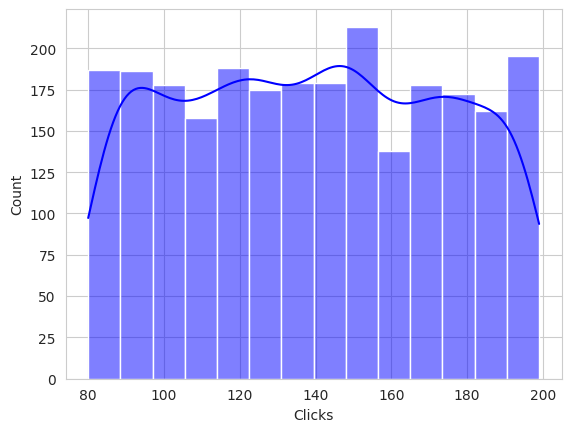

In [29]:
sns.histplot(df["Clicks"], kde=True, color="blue")
plt.show()

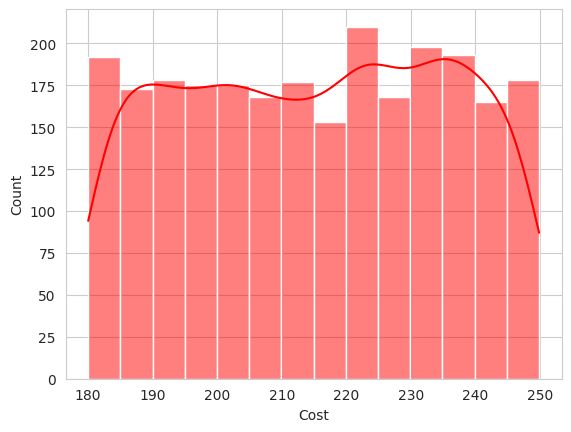

In [30]:
sns.histplot(df["Cost"], kde=True, color="red")
plt.show()

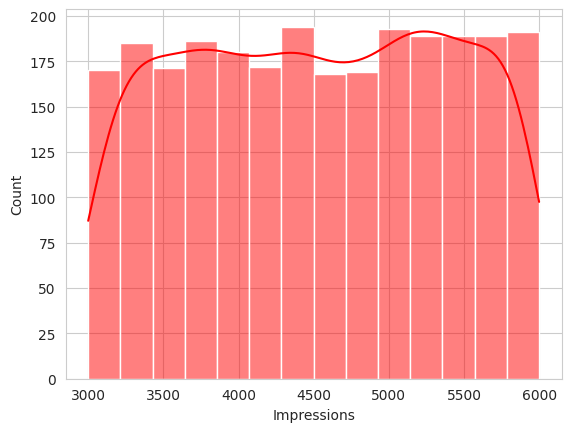

In [31]:
sns.histplot(df["Impressions"], kde=True, color="red")
plt.show()

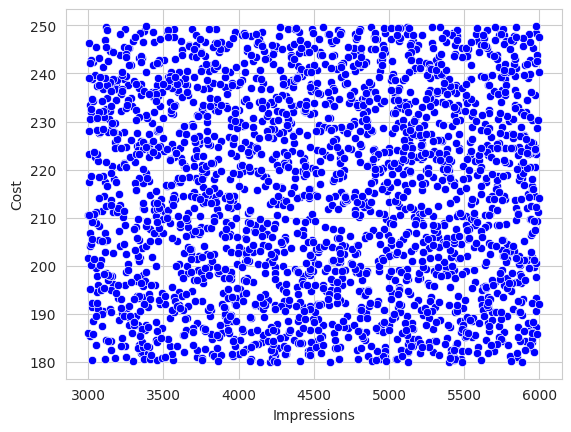

In [34]:
sns.scatterplot(data=df, x="Impressions", y="Cost", color="blue")
plt.show()

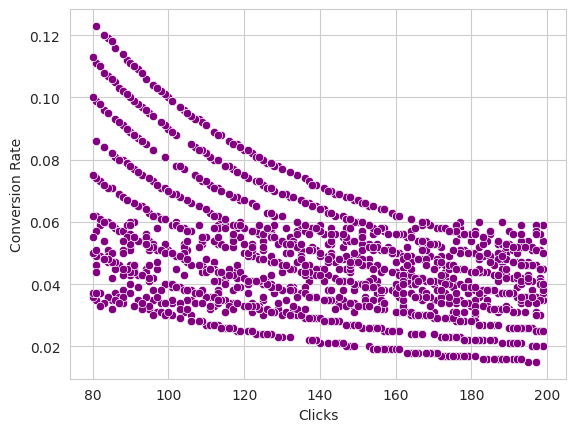

In [35]:
sns.scatterplot(data=df, x="Clicks", y="Conversion Rate", color="purple")
plt.show()

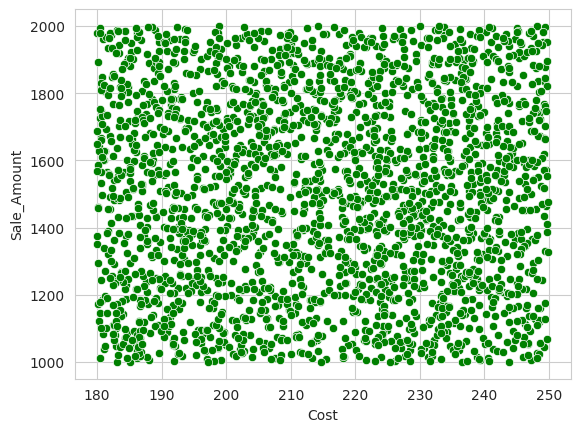

In [36]:
sns.scatterplot(data=df, x="Cost", y="Sale_Amount", color="green")
plt.show()

In [37]:
df.dtypes

,0
Campaign_Name,object
Clicks,float64
Impressions,float64
Cost,float64
Leads,float64
Conversions,float64
Conversion Rate,float64
Sale_Amount,float64
Ad_Date,object
Location,object


In [40]:
cols=["Campaign_Name", "Location","Device"]
for col in cols:
  col+'average_cost'=df.groupby(col)["Cost"].mean()
  col+'average_sale_amount'= df.groupby(col)["Sale_Amount"].mean()
  col+'average_clicks'=df.groupby(col)["Clicks"].mean()
  col+'average_impressions'=df.groupby(col)["Impressions"].mean()
  col+'average_conversion_rate'=df.groupby(col)["Conversion Rate"].mean()
  col+'average_leads'=df.groupby(col)["Leads"].mean()

Campaign_Name
Data Analytcis Course    215.211603
Data Analytics Corse     215.817796
Data Anlytics Corse      214.799307
DataAnalyticsCourse      214.509594
Name: Cost, dtype: float64


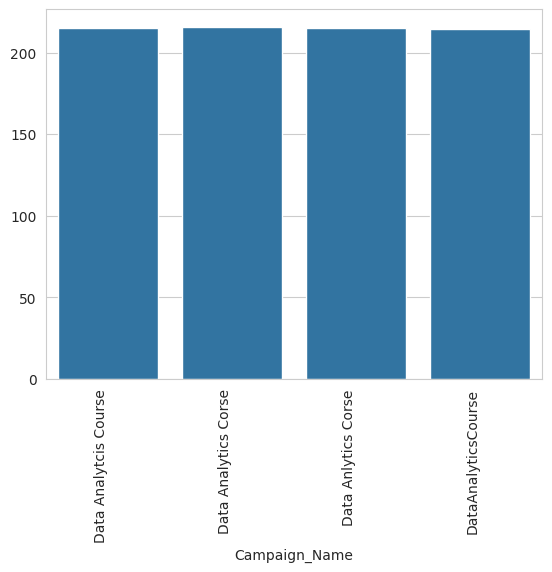

In [41]:
sns.barplot(x=average_metrics['Campaign_Name_average_cost'].index, y=average_metrics['Campaign_Name_average_cost'].values)
plt.xticks(rotation=90, ha="right")
plt.show()

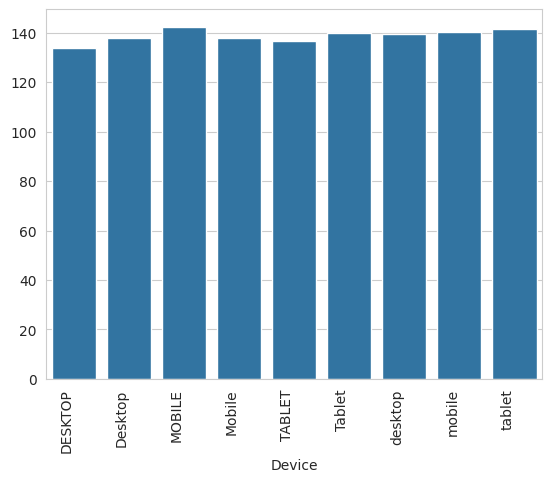

In [42]:
sns.barplot(x=average_metrics['Device_average_clicks'].index, y=average_metrics["Device_average_clicks"].values)
plt.xticks(rotation=90, ha="right")
plt.show()

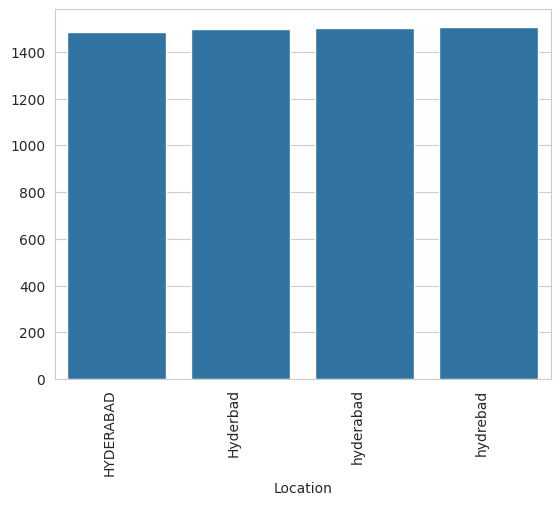

In [43]:
sns.barplot(x=average_metrics['Location_average_sale_amount'].index, y=average_metrics['Location_average_sale_amount'].values)
plt.xticks(rotation=90, ha="right")
plt.show()

In [45]:
df.dtypes

,0
Campaign_Name,object
Clicks,float64
Impressions,float64
Cost,float64
Leads,float64
Conversions,float64
Conversion Rate,float64
Sale_Amount,float64
Ad_Date,datetime64[ns]
Location,object


In [46]:
from time import time

In [48]:
df["Month"]=df["Ad_Date"].dt.month

In [56]:
month_average_cost=df.groupby("Month")["Cost"].sum()

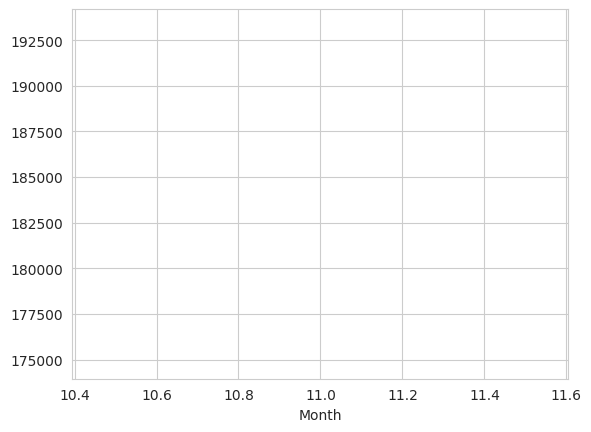

In [57]:
sns.lineplot(x=month_average_cost.index, y=month_average_cost.values, color="red")
plt.show()

In [58]:
month_average_cost

,Cost
Month,
11.0,184078.63


In [59]:
df["Month"]

,Month
0,11.0
1,NaN
2,NaN
3,11.0
4,11.0
...,...
2595,NaN
2596,NaN
2597,11.0
2598,11.0


In [60]:
df["Month"].unique()

array([11., nan])

In [63]:
import plotly.express as px
monthly_sales = df.groupby('Month')['Sale_Amount'].sum().reset_index()

fig_month = px.line(monthly_sales, x='Month', y='Sale_Amount', markers=True,
                    title='Total Sale Amount by Month (All Years)',
                    line_shape='spline')
fig_month.show()

In [64]:
df.isnull().sum()

,0
Campaign_Name,0
Clicks,112
Impressions,54
Cost,97
Leads,48
Conversions,74
Conversion Rate,626
Sale_Amount,139
Ad_Date,1707
Location,0


In [66]:
df.isnull().sum()

,0
Campaign_Name,0
Clicks,0
Impressions,0
Cost,0
Leads,0
Conversions,0
Conversion Rate,0
Sale_Amount,0
Ad_Date,0
Location,0


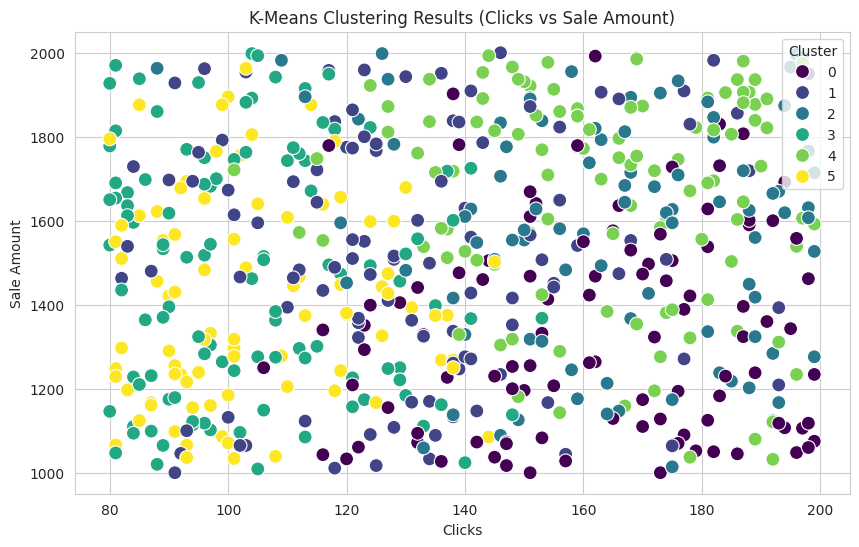

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_kmeans, x="Clicks", y="Sale_Amount", hue="Cluster", palette="viridis", s=100)
plt.title('K-Means Clustering Results (Clicks vs Sale Amount)')
plt.xlabel('Clicks')
plt.ylabel('Sale Amount')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()